# Risk measure 

## VaR (Value At Risk)

- Can a financial institution still be in business after a catastrophic event? Measure in a simple number!!!
- What is the expected loss in dollars over a year with 5% probability?

- _a measure of minimum loss of a financial (long) position in a specific time period for a given probability!_

\begin{align*}
  p = \mathbb{P}[L > VaR]= 1-F(VaR)
\end{align*}

- Factors affecting VaR
  - probability
  - duration
  - the distribution of portfolio
  - mark-to-market value of the position

- portfolio returns follow a normal distribution
- Need at least 1 year daily return data
- Procedure
  - get portfolio return
  - get mean and standard deviation of historical daily portfolio returns
  - calculate x% VaR

**pesudo code/more precise explanation**

1. step : get each asset's cumulative return

\begin{align*}
    \begin{bmatrix}
       x_1^N \\
       x_2^N  \\
       \vdots \\
       x_t^N
    \end{bmatrix}
  \longrightarrow  
  \begin{bmatrix}
     (1+R_1^N) \\
     (1+R_1^N)(1+R_2^N)\\
     \vdots \\
     ((1+R_1^N)(1+R_2^N)\cdots (1+R_t^N)
  \end{bmatrix}
  \triangleq
  \begin{bmatrix}
      CR_1^N \\
       CR_2^N  \\
       \vdots \\
       CR_t^N
  \end{bmatrix}
\end{align*}

where 
  - $x_t^N$ is asset $N's$ price at time t
  - $R_t^N$ is its net return
  - $CR_t^N$ is cumulative return at time t 

2. step2: get portfolio return with weight

\begin{align*} w_t^1 \times
    \begin{bmatrix}
       CR_1^1 \\
       CR_2^1  \\
       \vdots \\
       CR_t^1
    \end{bmatrix}
   + w_t^2 \times  
   \begin{bmatrix}
      CR_1^2 \\
      CR_2^2  \\
       \vdots \\
      CR_t^2
    \end{bmatrix}
    + \cdots \cdots  + w_t^N \times  
   \begin{bmatrix}
      CR_1^N \\
      CR_2^N  \\
       \vdots \\
      CR_t^N
    \end{bmatrix}
    = 
    \begin{bmatrix}
      R_1^p \\
      R_2^p  \\
       \vdots \\
      R_t^p
    \end{bmatrix}
\end{align*}

where 
- $CR_t^N$: asset $N's$ cumulative return at time $t$ 
- $R_t^p$: portfolio return at time $t$

3. step3: get portfolio's cumulative return

\begin{align*}
    \begin{bmatrix}
       R_1^p \\
      R_2^p  \\
       \vdots \\
      R_t^p
    \end{bmatrix}
  \longrightarrow  
  \begin{bmatrix}
     (1+R_1^p) \\
     (1+R_1^p)(1+R_2^p)\\
     \vdots \\
     ((1+R_1^p)(1+R_2^p)\cdots (1+R_t^p)
  \end{bmatrix}
  \triangleq
  \begin{bmatrix}
      CR_1^p \\
       CR_2^p  \\
       \vdots \\
       CR_t^p
  \end{bmatrix}
\end{align*}

where 
  - $R_t^p$ is the portfolio's return at time t
  - $CR_t^p$ is portfolio cumulative return at time t 

4. step4: get portfolio's net return

\begin{align*}
    \begin{bmatrix}
      CR_1^p \\
      CR_2^p  \\
       \vdots \\
      CR_t^p
    \end{bmatrix}
    \longrightarrow
    \begin{bmatrix}
      NR_1^p \\
      NR_2^p  \\
       \vdots \\
      NR_t^p
    \end{bmatrix}
\end{align*}

- where $NR_t^p = \frac{CR_{t}^p - CR_{t-1}}{CR_{t-1}} $

**step5**: get mean($\mu$) and standard deviation ($\sigma$) of the portfolio's net return

**step6**: calculate 5%(for example) VaR:
\begin{align*}
  VaR_{\alpha} = (\mu + \sigma \cdot z_{score})
\end{align*}

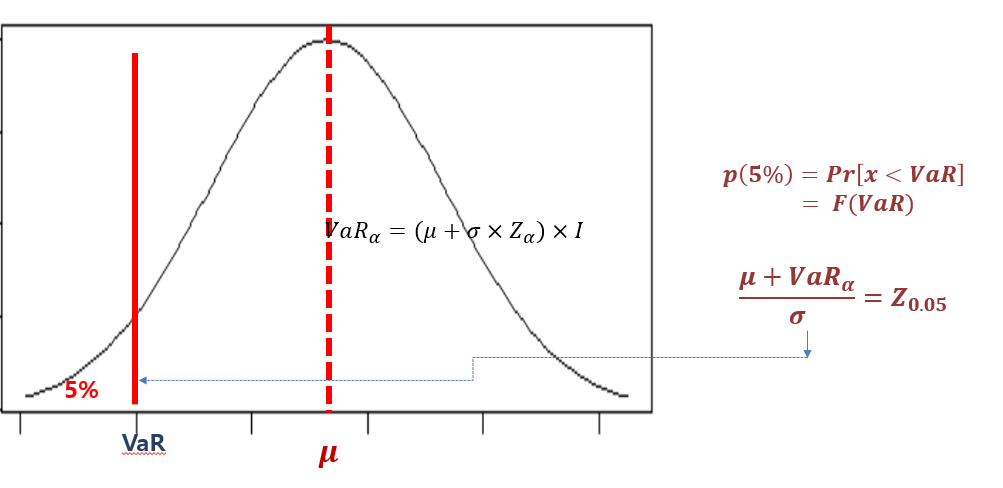

In [4]:
from IPython.display import Image 
Image("c:/python/images/VaR.PNG", width=1200, height=400)

## VaR: empirics with a single equity

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
import fix_yahoo_finance as yf 

### Historicla VaR

In [2]:
data = yf.download('AMZN', start = '2011-12-31')

[*********************100%***********************]  1 of 1 downloaded


In [3]:
data['Ret'] = data['Close'].pct_change()
data.dropna(inplace=True)

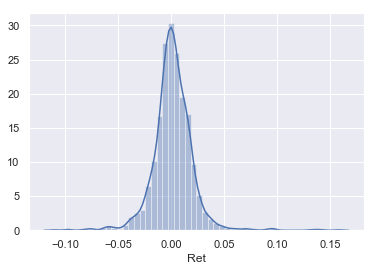

In [4]:
sns.distplot(data['Ret'])

In [5]:
print(data['Ret'].quantile(0.01))
print(data['Ret'].quantile(0.05))
print(data['Ret'].quantile(0.1))

# Interpretation 1: 
  ## for example, VaR(5%), it is expected that expected 
  ## loss will not excess 2.70% with 95% confidence

# Interpretation 2:
  ## if you invest USD10,000, your daily loss will not exceed USD257.58 
  ## with 95% confidence 

-0.05274654962017293
-0.02569659292349031
-0.018080843053609096


**More on interpretation**

- "1-day VaR0.05 = USD257” tells us:
  - I am 95% sure I won’t lose more than 1USD 257 in the next trading days
  - There is 95% chance that my loss will be smaller than USD 257 tomorrow
  -  There is 5% chance that my loss will be larger than USD257 

- However, it does not say anything about the size of the loss once a loss beyond USD 257
  - what is the probability more than USD 257 loss?
  - all is saying the 5% chance the minimum loss will be USD 257

### $n-days$ VaR

- for $n$-days VaR?
  - $\sqrt{n} \cdot VaR$?
  - why? 
     - $var\big(P_t- P_{t-n} \big)= var\big(\sum_{i=1}^{n}\Delta P_{t-i}\big)\overset{iid}{=} n \cdot \sigma^2$

In [30]:
### Is it right?

data['Cum_Ret'] = (1.0 + data['Ret']).cumprod()

In [31]:
data['Cum_NetRet'] = data['Cum_Ret'].pct_change()
data.dropna(inplace=True)

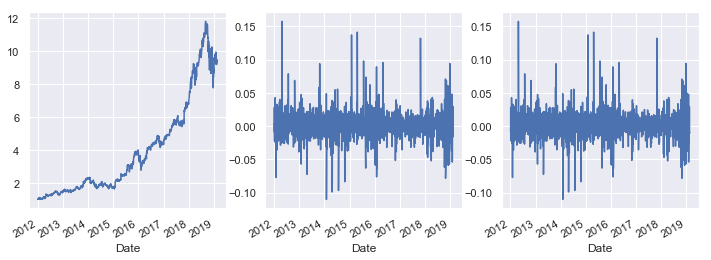

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
data['Cum_Ret'].plot(ax=ax1)
data['Ret'].plot(ax=ax2)
data['Cum_NetRet'].plot(ax=ax3)

In [50]:
print(data['Cum_NetRet'].quantile(0.01))
print(data['Cum_NetRet'].quantile(0.05))
print(data['Cum_NetRet'].quantile(0.1))

-0.05412088757772238
-0.025764223059542957
-0.0181023607832711


### Gaussian VaR

In [53]:
mu = np.mean(data['Cum_NetRet'])
sigma = np.std(data['Cum_NetRet'])

In [54]:
print(np.max(data['Cum_NetRet']), np.min(data['Cum_NetRet']))

0.15745701419824965 -0.10997247438097124


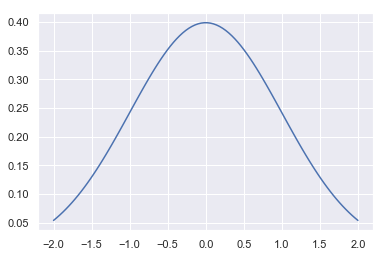

In [92]:
from scipy.stats import norm 

x = np.linspace(-2, 2, 100)
x_pdf = norm.pdf(x)
plt.plot(x, x_pdf); 

In [97]:
print(norm.ppf(0.01, mu, sigma), data['Cum_NetRet'].quantile(0.01))
print(norm.ppf(0.05, mu, sigma), data['Cum_NetRet'].quantile(0.05))
print(norm.ppf(0.1, mu, sigma), data['Cum_NetRet'].quantile(0.1))

-0.04351459357149217 -0.05412088757772238
-0.03035372392049388 -0.025764223059542957
-0.023337713008390295 -0.0181023607832711


### Monte Carlo Simulation: VaR

\begin{align*}
  \frac{dS}{S} = \mu dt + \sigma \epsilon \sqrt{dt}
\end{align*}

- S: stock price
- $log(S_t/S_o)$ is normally distributed with mean=$(\mu - \sigma^2/2)t, variance=\sigma^2 t $

In [106]:
data[data.index == '2018-01-03']

,Open,High,Low,Close,Adj Close,Volume,Ret,Cum_Ret,Cum_NetRet
Date,,,,,,,,,
2018-01-03,1188.300049,1205.48999,1188.300049,1204.199951,1204.199951,3108800,0.012775,6.956672,0.012775


In [144]:
days = 240
dt = 1/float(days)
mu = data['Ret'].mean() 
sigma = data['Ret'].std()

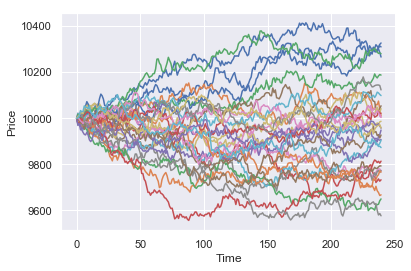

In [146]:
for i in range(30):
    plt.plot(gbm(p0=10000, days=days))
    plt.xlabel('Time')
    plt.ylabel('Price')

In [156]:
gbm(1000, days-1)

array([1000.        , 1000.04219767, 1000.68742861,  996.62366291,
        997.96696423,  996.27025723,  995.42674007,  997.61625127,
        997.86300471,  997.02155669,  994.6130518 ,  995.49797742,
        995.26325264,  996.25520934,  995.80037251,  997.45093867,
        998.24832941,  998.06181357,  998.15106832,  997.21029332,
        995.21787577,  993.46856011,  994.49653297,  995.08627955,
        992.77146525,  990.56827444,  988.79318432,  986.81247369,
        987.89402191,  987.07148745,  987.56643223,  985.2830631 ,
        984.53671052,  985.16268191,  984.03747938,  986.18709536,
        986.1567777 ,  984.59108235,  985.77032984,  985.7361637 ,
        984.51247439,  983.85923097,  985.72667619,  985.47080517,
        984.8028432 ,  984.75812327,  986.09075423,  985.86496337,
        985.621489  ,  984.88975638,  983.2966836 ,  982.2694827 ,
        984.0166389 ,  985.67972897,  985.80576232,  984.19443061,
        983.39939226,  982.06261538,  981.96174694,  982.42087

In [ ]:
runs = 10000
simulations = numpy.zeros(runs)
for run in range(runs):
    simulations[run] = random_walk(10.0)[days-1]
q = numpy.percentile(simulations, 1)
plt.hist(simulations, density=True, bins=30, histtype='stepfilled', alpha=0.5)
plt.figtext(0.6, 0.8, "Start price: 10€")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}€".format(simulations.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}€".format(10 - q))
plt.figtext(0.15, 0.6, "q(0.99): {:.3}€".format(q))
plt.axvline(x=q, linewidth=4, color='r')
plt.title("Final price distribution after {} days".format(days), weight='bold');


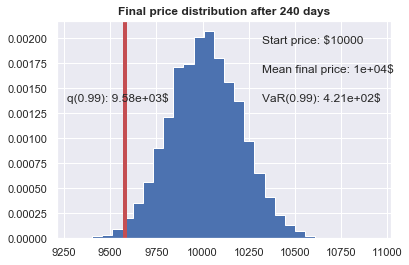

In [166]:
size = 10000
mc_sim = np.zeros(size)
for i in range(size):
    mc_sim[i] = gbm(10000, days)[days-1]
q = np.percentile(mc_sim, 1)
plt.hist(mc_sim, density=True, bins=30, histtype='stepfilled')
#sns.distplot(mc_sim)
plt.figtext(0.6, 0.8, "Start price: $10000")
plt.figtext(0.6, 0.7, "Mean final price: {:.3}$".format(mc_sim.mean()))
plt.figtext(0.6, 0.6, "VaR(0.99): {:.3}$".format(10000 - q))
plt.figtext(0.15, 0.6, "q(0.99): {:.3}$".format(q))
plt.axvline(x=q, linewidth=4, color='r')
plt.title("Final price distribution after {} days".format(days), weight='bold');



In [167]:
def gbm(p0, days):
    price = np.zeros(days)
    shock = np.zeros(days)
    price[0] = p0
    for i in range(1, days):
        shock[i] = np.random.normal(loc=mu*dt,scale = sigma * np.sqrt(dt) )
        #print(shock[i])
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

In [168]:
q 

9579.4618281099